# Рассмотрим данные полученные после 1st level analysis, полученные при помощи SPM

In [1]:
import os
from dotenv import load_dotenv

from nilearn import image as nimg
from nilearn import plotting as nplot
import nibabel as nib

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

/opt/miniconda-latest/envs/neuro/lib/python3.7/site-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [2]:
load_dotenv()
ROOT_DIR = os.getenv('FIRST_LEVEL_ANALYSIS_PATH')

- Для каждого возраста отдельные директории

In [3]:
!ls $ROOT_DIR

A  T  Y


**Для каждого участника:** 
   - Результаты SPM
   - Необработанное анатомическое изображение
   - Необработанное функциональное изображение

In [4]:
!tree $ROOT_DIR/T/sub-t06

/home/neuro/functional_connectivity/fmri_combined/fMRI data after preprocessing and 1st level/T/sub-t06
├── 1st level analysis
│   ├── beta_0001.nii
│   ├── beta_0002.nii
│   ├── beta_0003.nii
│   ├── beta_0004.nii
│   ├── beta_0005.nii
│   ├── beta_0006.nii
│   ├── beta_0007.nii
│   ├── beta_0008.nii
│   ├── beta_0009.nii
│   ├── mask.nii
│   ├── ResMS.nii
│   ├── RPV.nii
│   ├── SPM.mat
│   ├── VOI_CSF_1_eigen.nii
│   ├── VOI_CSF_1.mat
│   ├── VOI_CSF_mask.nii
│   ├── VOI_WM_1_eigen.nii
│   ├── VOI_WM_1.mat
│   └── VOI_WM_mask.nii
├── anat
│   └── sub-t06_T1w.nii
└── func_rest
    └── sub-t06_task-rest_bold.nii

3 directories, 21 files


In [11]:
# Сhoose partisipant
sub_t06 = os.path.join(ROOT_DIR.replace("\\", ""), 'T/sub-t06/')

# Сырые данные

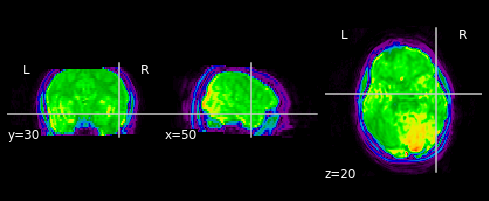

In [12]:
# Raw functional image
raw_func_img = nib.load(os.path.join(sub_t06, 'func_rest/sub-t06_task-rest_bold.nii'))
raw_func_vol5 = raw_func_img.slicer[:,:,:,6]
nplot.plot_epi(raw_func_vol5, cut_coords=(50,30,20))

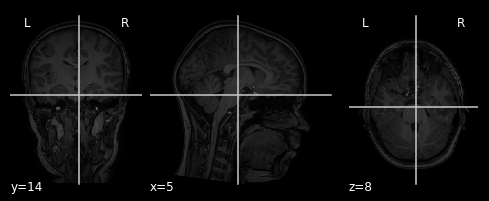

In [15]:
# Raw T1 image
raw_anat_img = nib.load(os.path.join(sub_t06, 'anat/sub-t06_T1w.nii'))
nplot.plot_anat(raw_anat_img)

# Результаты 1st lvl

In [23]:
nifli_files = [nifti_files for nifti_files in os.listdir(os.path.join(sub_t06, '1st level analysis'))\
               if '.nii' in nifti_files]

- Функциональных файлов здесь нет
- Если я правильно понимаю, это выделенные контрасты

(61, 73, 61)
(61, 73, 61)
(61, 73, 61)


/opt/miniconda-latest/envs/neuro/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "


(61, 73, 61)
(61, 73, 61)
(61, 73, 61)
(61, 73, 61)
(61, 73, 61)
(61, 73, 61)
(61, 73, 61)
(61, 73, 61)
(61, 73, 61)
(61, 73, 61)
(61, 73, 61)
(61, 73, 61)
(61, 73, 61)


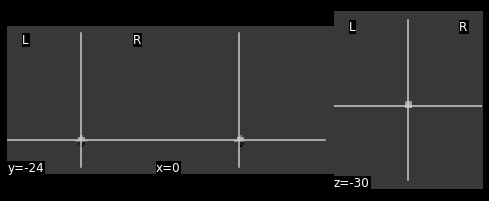

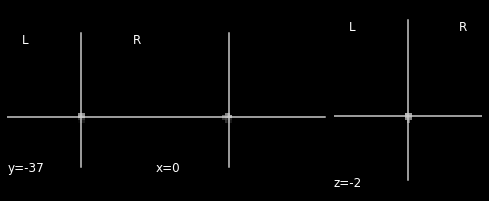

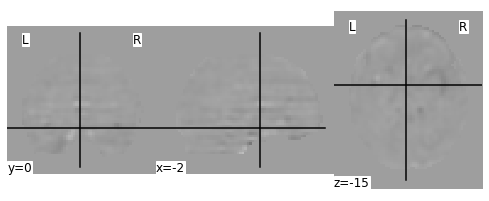

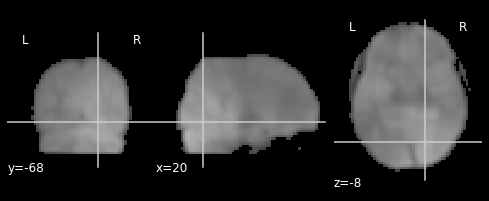

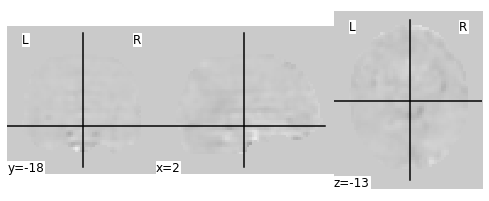

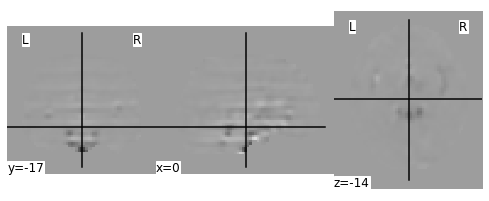

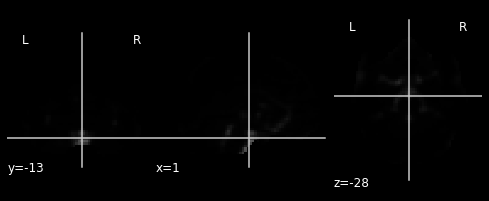

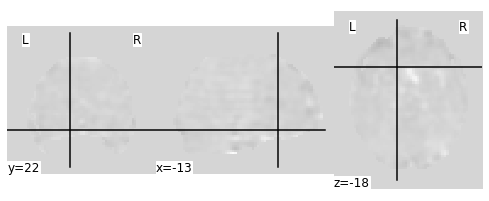

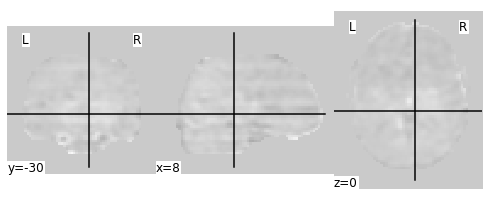

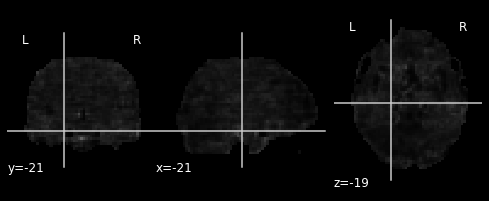

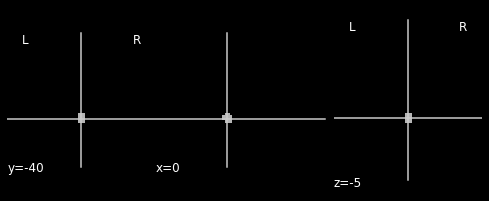

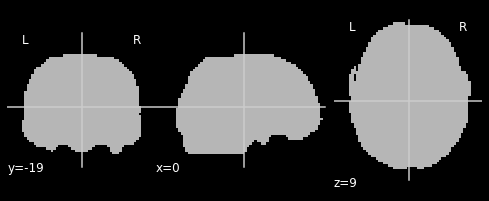

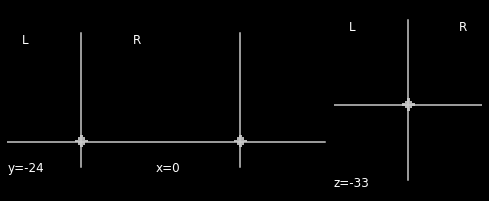

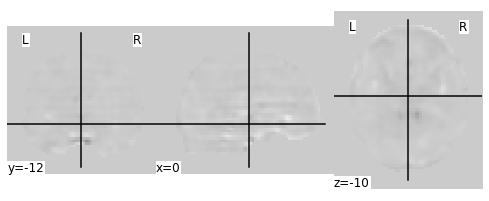

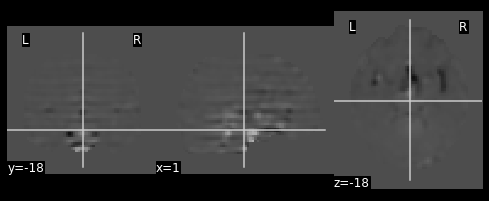

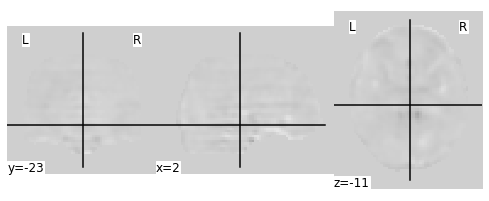

In [25]:
for file in nifli_files:
    img = nib.load(os.path.join(sub_t06, '1st level analysis/') + file)
    print(img.shape)
    nplot.plot_anat(img)

# SPM.mat file
- Содержане файла
- Непосредственно с ним не понятно как работать
- Возможно он содержит необходимые преобразования, которые были вычислены в ходе анализа, но его в любом случае нужно к чему-то применять
- Но это лишь предположение
- **В любом случае, как с этим работать я не придумал**

In [27]:
import scipy.io
mat = scipy.io.loadmat(os.path.join(sub_t06, '1st level analysis/SPM.mat'))

In [28]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Jan 10 18:13:26 2022',
 '__version__': '1.0',
 '__globals__': [],
 'SPM': array([[(array([[(array([[1.5]]), array(['/Users/mariiabogdanova/Documents/T/sub-t06/func_rest/s6warsub-t06_task-rest_bold.nii,1  ',
                        '/Users/mariiabogdanova/Documents/T/sub-t06/func_rest/s6warsub-t06_task-rest_bold.nii,2  ',
                        '/Users/mariiabogdanova/Documents/T/sub-t06/func_rest/s6warsub-t06_task-rest_bold.nii,3  ',
                        '/Users/mariiabogdanova/Documents/T/sub-t06/func_rest/s6warsub-t06_task-rest_bold.nii,4  ',
                        '/Users/mariiabogdanova/Documents/T/sub-t06/func_rest/s6warsub-t06_task-rest_bold.nii,5  ',
                        '/Users/mariiabogdanova/Documents/T/sub-t06/func_rest/s6warsub-t06_task-rest_bold.nii,6  ',
                        '/Users/mariiabogdanova/Documents/T/sub-t06/func_rest/s6warsub-t06_task-rest_bold.nii,7  ',
                        '